In [109]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [110]:
base = pd.read_csv('iris.csv')
base.head(2)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [111]:
base['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [112]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [113]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [114]:
classe = labelencoder.fit_transform(classe)
classe[0:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
classe_dummy = np_utils.to_categorical(classe)
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1
classe_dummy[0:8]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [116]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe_dummy, test_size=0.25)

In [117]:
classificador = Sequential()

classificador.add(Dense(units = 4, # (4 inputs + 3 possible outputs)/2 = 3.5
                        activation = 'relu', input_dim = 4))

classificador.add(Dense(units = 4, activation = 'relu'))

classificador.add(Dense(units = 3, 
                        activation = 'softmax' # sigmoide---> binario, softmax---> multiplas classes
                        ))

classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
classificador.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [118]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10,
                  epochs = 500)

Epoch 1/500
12/12 [==============================] - 0s 2ms/step - loss: 1.4223 - categorical_accuracy: 0.3304
Epoch 2/500
12/12 [==============================] - 0s 1000us/step - loss: 1.2826 - categorical_accuracy: 0.3304
Epoch 3/500
12/12 [==============================] - 0s 916us/step - loss: 1.1734 - categorical_accuracy: 0.3304
Epoch 4/500
12/12 [==============================] - 0s 999us/step - loss: 1.0821 - categorical_accuracy: 0.3304
Epoch 5/500
12/12 [==============================] - 0s 916us/step - loss: 0.9945 - categorical_accuracy: 0.3393
Epoch 6/500
12/12 [==============================] - 0s 999us/step - loss: 0.9304 - categorical_accuracy: 0.4911
Epoch 7/500
12/12 [==============================] - 0s 999us/step - loss: 0.8779 - categorical_accuracy: 0.5714
Epoch 8/500
12/12 [==============================] - 0s 999us/step - loss: 0.8399 - categorical_accuracy: 0.6518
Epoch 9/500
12/12 [==============================] - 0s 916us/step - loss: 0.8059 - categorical_a

In [119]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

2/2 [==============================] - 0s 1ms/step - loss: 0.0544 - categorical_accuracy: 0.9737


In [120]:
previsoes = classificador.predict(previsores_teste)
previsoes[0:8]

array([[1.1645474e-05, 9.9402207e-01, 5.9663621e-03],
       [4.7235437e-07, 8.3347724e-04, 9.9916601e-01],
       [9.9996126e-01, 2.3612038e-05, 1.5118969e-05],
       [1.3573464e-05, 9.8016435e-01, 1.9822139e-02],
       [6.5205777e-06, 3.2375149e-02, 9.6761829e-01],
       [1.7593869e-06, 9.9836046e-01, 1.6377090e-03],
       [9.9999094e-01, 5.0290009e-06, 4.1054277e-06],
       [2.7367209e-05, 3.2773012e-01, 6.7224246e-01]], dtype=float32)

In [121]:
previsoes = (previsoes > 0.5)
previsoes[0:8]

array([[False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True]])

In [122]:
classe_teste[0:8]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [123]:
import numpy as np
classe_teste2 = [np.argmax(t) for t in classe_teste]
classe_teste2[0:8]

[1, 2, 0, 1, 2, 1, 0, 2]

In [124]:
previsoes[0:8]

array([[False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True]])

In [125]:
previsoes2 = [np.argmax(t) for t in previsoes]
previsoes2[0:8]

[1, 2, 0, 1, 2, 1, 0, 2]

In [126]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(previsoes2, classe_teste2)

In [127]:
matriz

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]], dtype=int64)

In [128]:
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1

In [129]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:>

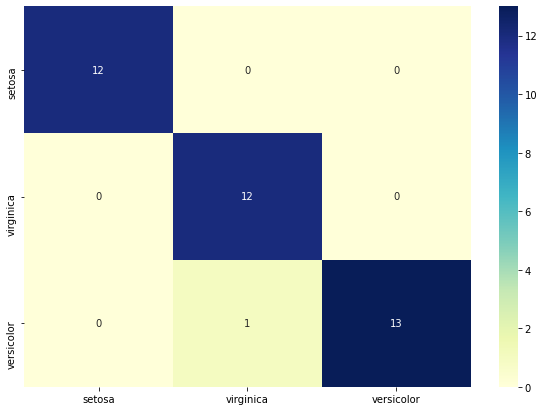

In [130]:
df_cm = pd.DataFrame(matriz, index = [i for i in ['setosa', 'virginica', 'versicolor']],
                  columns = [i for i in ['setosa', 'virginica', 'versicolor']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")